### Дипломная работа по курсу «Python для анализа данных»

**Загрузка файла hr.csv**

In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as sts
import statistics

In [5]:
hr = pd.read_csv('hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<!-- В дальнейшем для переменных я буду использовать следующие названия:
- satisfaction_level - Уровень удовлетворенности
- last_evaluation - Последняя оценка
- number_project - Номер проекта
- average_montly_hours - Среднемесячное количество рабочих часов
- time_spend_company - Стаж в компании
- Work_accident - Инцидент на работе
- left - Уволился
- promotion_last_5years - Повышение в последние 5 лет -->

In [25]:
print("Уникальные значения\nСтаж в компании: ", hr.time_spend_company.unique(),
      "\nИнцидент на работе: ", hr.Work_accident.unique(),
      "\nУволен: ", hr.left.unique(),
      "\nПовышение в последние 5 лет: ", hr.promotion_last_5years.unique(),
      "\nОтдел: ", hr.sales.unique(),
      "\nЗарплата: ", hr.salary.unique()
     )

Уникальные значения
Стаж в компании:  [ 3  6  4  5  2  8 10  7] 
Инцидент на работе:  [0 1] 
Уволен:  [1 0] 
Повышение в последние 5 лет:  [0 1] 
Отдел:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD'] 
Зарплата:  ['low' 'medium' 'high']


Пустые значения в датасете отсутствуют. 
Переменные "Уровень удовлетворенности" и "Последняя оценка" представляют шкалу от 0 до 1.
Переменные "Инцидент на работе", "Уволен" и "Повышение в последние 5 лет" - категориальные переменные бинарного типа. 
"Отдел" и "Зарплата" - категориальные переменные.

**Основные статистики для переменных**

In [62]:
print("Среднее:\n", hr.describe().loc['mean',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])

print("\nМедиана:\n", hr.describe().loc['50%',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])

print("\nМинимум:\n", hr.describe().loc['min',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])

print("\nМаксимум:\n", hr.describe().loc['max',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])

print("\nСреднее отклонение:\n", hr.describe().loc['std',['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']])


Среднее:
 satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
Name: mean, dtype: float64

Медиана:
 satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
Name: 50%, dtype: float64

Минимум:
 satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
Name: min, dtype: float64

Максимум:
 satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
Name: max, dtype: float64

Среднее отклонение:
 satisfaction_level       0.248631
last_evaluation          0.171169
number_project           1.232592
average_montly_hours    49.943099
time_spend_company       1.460136
Name: std, dtype: float64


In [61]:
print("Значения моды для каждоый переменной")
for col in hr.columns:
    print(col, '\t', hr[col].value_counts().index[0], '\t', hr[col].value_counts().iloc[0], "значений")

Значения моды для каждоый переменной
satisfaction_level 	 0.1 	 358 значений
last_evaluation 	 0.55 	 358 значений
number_project 	 4 	 4365 значений
average_montly_hours 	 156 	 153 значений
time_spend_company 	 3 	 6443 значений
Work_accident 	 0 	 12830 значений
left 	 0 	 11428 значений
promotion_last_5years 	 0 	 14680 значений
sales 	 sales 	 4140 значений
salary 	 low 	 7316 значений


Переменные "Уровень удовлетворенности" и "Последняя оценка" имеют более непрерывный характер и большое множество уникальных значений. Для них нагляднее было бы использовать разбиение на интервалы. 

Тогда мы увидим, что наибольшее количество значений "Уровня удовлетворенности" попало в интервал (0.727, 0.772] - 1215 значений. Этот интервал и является интервалом моды.

Наибольшее количество значений "Последняя оценка" попало в интервал (0.488, 0.52] - 1339 значений.

In [63]:
hr.satisfaction_level.value_counts(bins=20)

(0.727, 0.772]     1215
(0.818, 0.863]     1129
(0.545, 0.59]       977
(0.499, 0.545]      976
(0.0881, 0.136]     972
(0.408, 0.454]      964
(0.636, 0.682]      953
(0.909, 0.954]      939
(0.772, 0.818]      900
(0.863, 0.909]      869
(0.954, 1.0]        845
(0.682, 0.727]      815
(0.363, 0.408]      814
(0.59, 0.636]       798
(0.454, 0.499]      495
(0.136, 0.181]      363
(0.318, 0.363]      310
(0.181, 0.226]      270
(0.226, 0.272]      228
(0.272, 0.318]      167
Name: satisfaction_level, dtype: int64

In [65]:
hr.last_evaluation.value_counts(bins=20)

(0.488, 0.52]     1339
(0.968, 1.0]      1080
(0.808, 0.84]     1055
(0.52, 0.552]     1032
(0.84, 0.872]      915
(0.552, 0.584]     880
(0.872, 0.904]     844
(0.904, 0.936]     825
(0.68, 0.712]      824
(0.936, 0.968]     770
(0.744, 0.776]     717
(0.584, 0.616]     710
(0.776, 0.808]     706
(0.616, 0.648]     704
(0.712, 0.744]     694
(0.456, 0.488]     676
(0.648, 0.68]      668
(0.424, 0.456]     209
(0.358, 0.392]     179
(0.392, 0.424]     172
Name: last_evaluation, dtype: int64

**Корреляционная матрица для переменных**

In [66]:
corr_matrix = hr.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


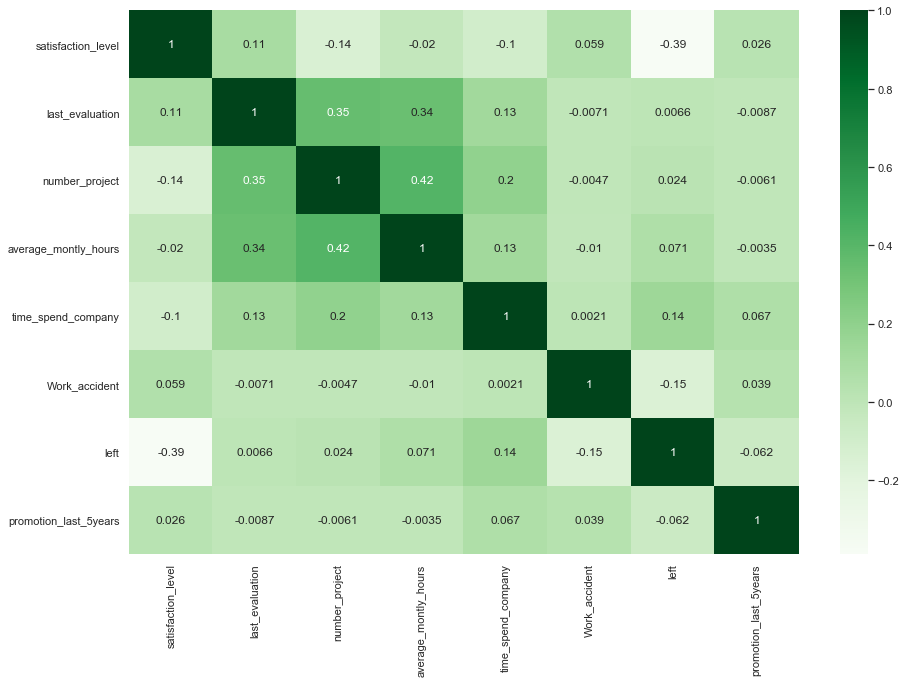

In [69]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, cmap='Greens')

**Визуализация нескольких взаимосвязей между переменными**

В корреляционной матрице нет перменных, сильно коррелирующих друг с другом. Для визуализации взаимосвязей возьму переменный, у которых коэффициент корреляции по модулю больше 0,3.

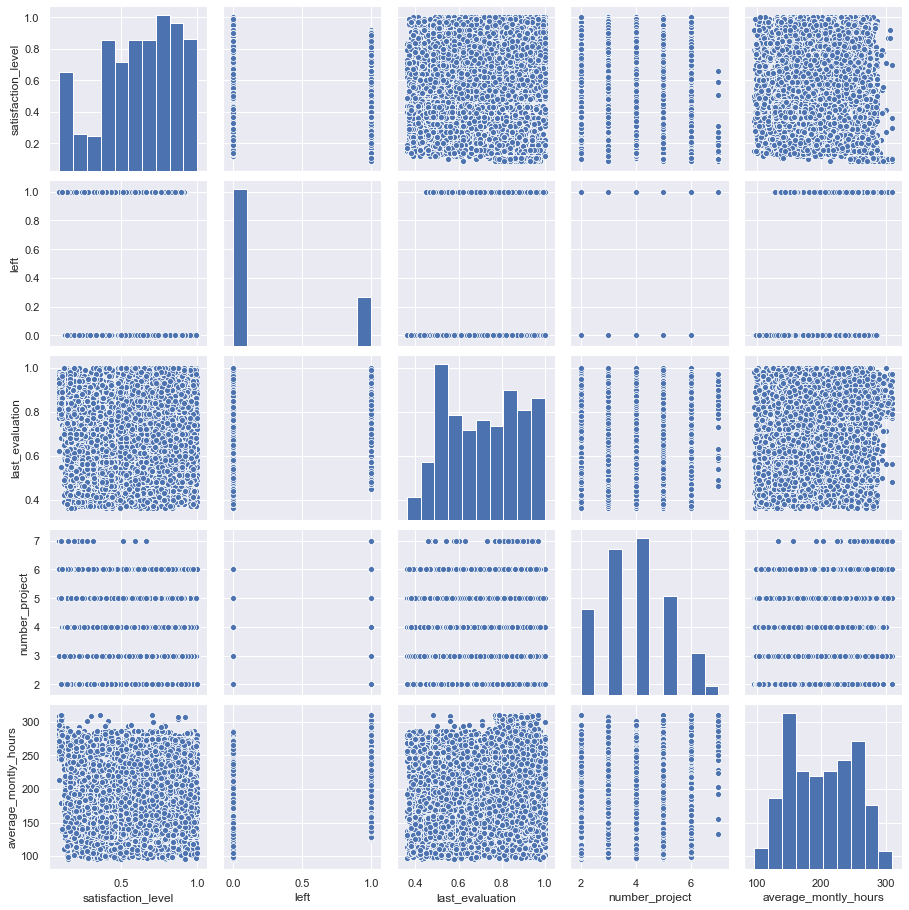

In [81]:
sns.pairplot(hr, vars=['satisfaction_level', 'left','last_evaluation', 'number_project', 'average_montly_hours'], kind="scatter")

Так как часть переменных категориальные - на scatterplot плохо видно взаимосвязи. Для пар непрерывных переменных "Уровень удовлетворенности" и "Последняя оценка", "Количество рабочих часов" и "Уровень удовлетворенности", "Количество рабочих часов" и "Последняя оценка" определить взаимосвязь не удается.

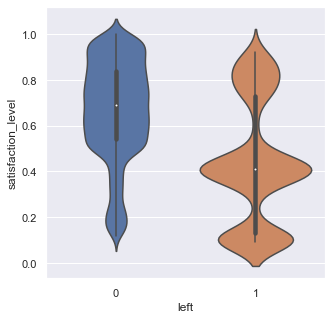

In [82]:
plt.rcParams['figure.figsize']=(5,5)
ax = sns.violinplot(x="left", y="satisfaction_level", data=hr)

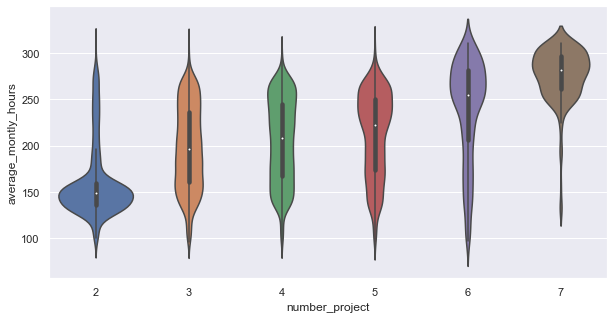

In [83]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.violinplot(x="number_project", y="average_montly_hours", data=hr)

**Проверка взаимосвязи между несколькими переменными с помощью t-статистики**

**Рассчитать сколько работников работает в каждом департаменте**

In [90]:
# фильтр hr.left==0 для подсчета ратоающих сотрудиков в отделах на данный момент
hr.loc[hr.left==0].sales.value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

**Распределение сотрудников по зарплатам**

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

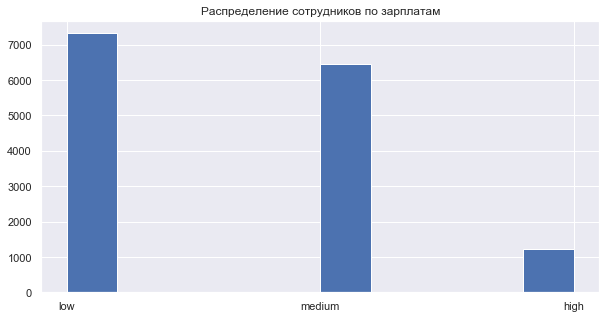

In [132]:
hr.salary.hist()
plt.title("Распределение сотрудников по зарплатам")

**Распределение сотрудников по зарплатам совместно с департаментами**

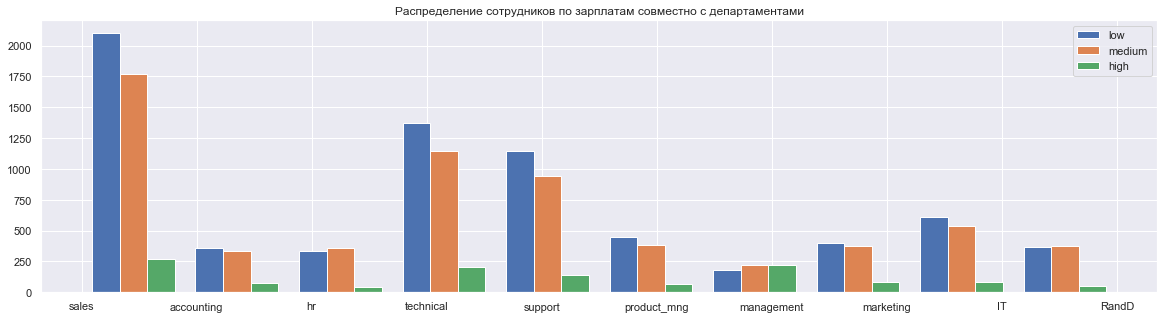

In [131]:
x = [hr[hr.salary==level].sales for level in hr.salary.unique()]
plt.figure(figsize=(20,5))
plt.hist(x)
plt.title('Распределение сотрудников по зарплатам совместно с департаментами')
plt.legend(hr.salary.unique())

**Сколько сотрудников покинули компанию**

In [135]:
print(hr.left.sum(), "сотрудников покинули компанию")

3571 сотрудников покинули компанию


## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

**1. Сотрудники, покинувшие компанию, имели такой же уровень удовлетворенности, как и те, что не покинули**

In [175]:
left_satistf = hr[hr['left']==1]['satisfaction_level']
stayed_satistf = hr[hr['left']==0]['satisfaction_level']

In [176]:
len(left_satistf), len(stayed_satistf)

(3571, 11428)

In [177]:
left_satistf = left_satistf.sample(3500)
stayed_satistf = stayed_satistf.sample(3500)

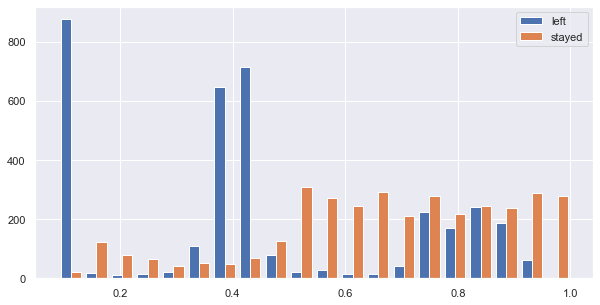

In [178]:
plt.hist([left_satistf, stayed_satistf], bins = 20, label=['left', 'stayed'])
plt.legend(loc='upper right')
plt.show()

In [179]:
sts.shapiro(left_satistf)

(0.8883556723594666, 9.80908925027372e-45)

In [180]:
sts.shapiro(stayed_satistf)

(0.9501330256462097, 6.087192435925611e-33)

In [182]:
statistics.variance(left_satistf), statistics.variance(stayed_satistf)

(0.06965269922835096, 0.0490384475237823)

In [184]:
# две группы имеют далеки от нормального распределения и имеют разные дисперсии, поэтому применим т-тест Манна-Уитни

sts.mannwhitneyu(left_satistf, stayed_satistf)

MannwhitneyuResult(statistic=3066377.5, pvalue=4.6510527140324486e-287)

**2. Уровень оценки сотрудников, не отличался как для сотрудников, покинувших компанию, так и оставшихся сотрудников**

In [215]:
left_evaluation = hr[hr['left']==1]['last_evaluation']
stayed_evaluation = hr[hr['left']==0]['last_evaluation']

In [216]:
len(left_evaluation), len(stayed_evaluation)

(3571, 11428)

In [217]:
left_evaluation = left_evaluation.sample(3500)
stayed_evaluation = stayed_evaluation.sample(3500)

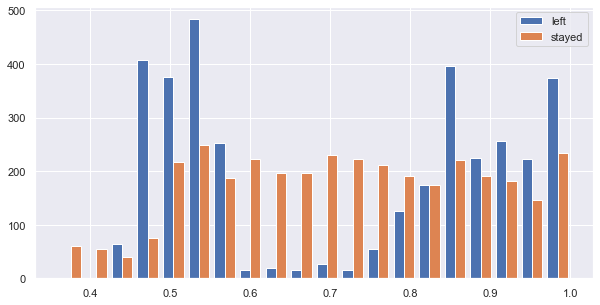

In [218]:
plt.hist([left_evaluation, stayed_evaluation], bins = 20, label=['left', 'stayed'])
plt.legend(loc='upper right')
plt.show()

In [219]:
sts.shapiro(left_evaluation)

(0.850818932056427, 0.0)

In [220]:
sts.shapiro(stayed_evaluation)

(0.9707223773002625, 3.6349690540085677e-26)

In [222]:
statistics.variance(left_evaluation), statistics.variance(stayed_evaluation)

(0.03914295444412689, 0.02652748768219491)

In [225]:
sts.mannwhitneyu(left_evaluation, stayed_evaluation)

MannwhitneyuResult(statistic=6082985.0, pvalue=0.3095633357063527)

**3. Сотрудники, покинувшие компанию, в среднем работали столько же часов, как и те, что не покинули**

In [201]:
left_hours = hr[hr['left']==1]['average_montly_hours']
stayed_hours = hr[hr['left']==0]['average_montly_hours']

In [202]:
len(left_hours), len(stayed_hours)

(3571, 11428)

In [203]:
left_hours = left_hours.sample(3500)
stayed_hours = stayed_hours.sample(3500)

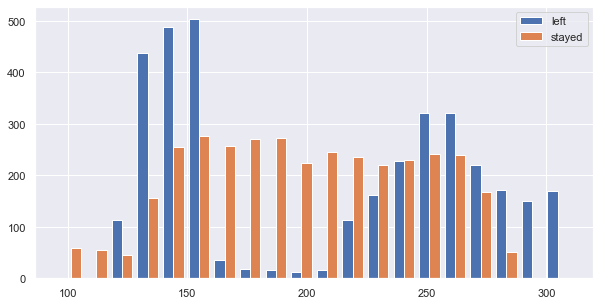

In [204]:
plt.hist([left_hours, stayed_hours], bins = 20, label=['left', 'stayed'])
plt.legend(loc='upper right')
plt.show()

In [205]:
sts.shapiro(left_hours)

(0.8665509223937988, 0.0)

In [206]:
sts.shapiro(stayed_hours)

(0.9735686182975769, 5.857692075137347e-25)

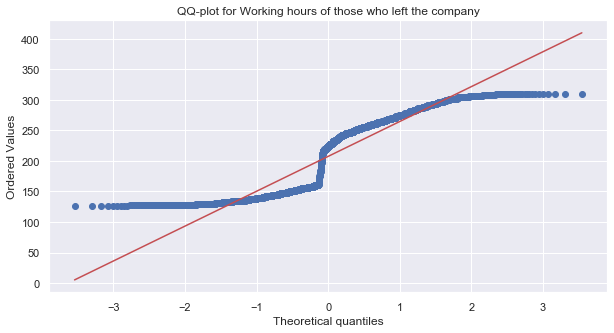

In [214]:
sts.probplot(left_hours, dist="norm", plot=pylab)
pylab.title('QQ-plot for Working hours of those who left the company')
pylab.show()

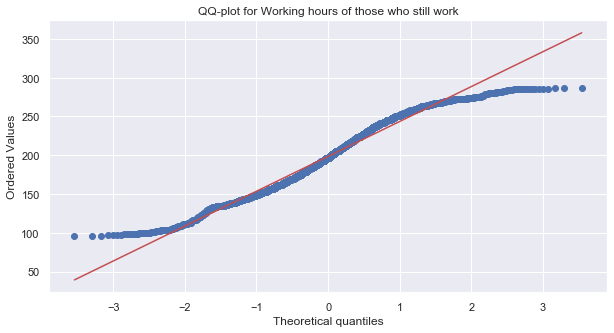

In [213]:
sts.probplot(stayed_hours, dist="norm", plot=pylab)
pylab.title('QQ-plot for Working hours of those who still work')
pylab.show()

In [207]:
statistics.variance(left_hours), statistics.variance(stayed_hours)

(3755.048435389703, 2073.8129636222593)

In [208]:
# две группы имеют далеки от нормального распределения и имеют разные дисперсии, поэтому применим т-тест Манна-Уитни

sts.mannwhitneyu(left_satistf, stayed_satistf)

Ttest_indResult(statistic=6.882163488149161, pvalue=6.450239965479062e-12)